In [60]:
#Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:

#Importing the dataset
data = pd.read_csv('covid usa.csv')

In [3]:
#Few useful displays of the data
data.head(10)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [4]:
data.tail(10)
#the below shows the bottom entries of the dataset

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
48,Tennessee,US,2020-05-21 02:32:54,35.7478,-86.6923,18412,305,11783.0,6324.0,47,269.608008,354013.0,1515.0,1.656528,84000047,USA,5183.833360,8.228329
49,Texas,US,2020-05-21 02:32:54,31.0545,-97.5635,51673,1426,30341.0,19906.0,48,178.208070,770241.0,NaN,2.759662,84000048,USA,2656.380746,NaN
50,Utah,US,2020-05-21 02:32:54,40.1500,-111.8624,7710,90,4423.0,3197.0,49,240.489738,179664.0,631.0,1.167315,84000049,USA,5604.065930,8.184176
51,Vermont,US,2020-05-21 02:32:54,44.0459,-72.7107,944,54,824.0,66.0,50,151.284718,25058.0,NaN,5.720339,84000050,USA,4015.775919,NaN
52,Virgin Islands,US,2020-05-21 02:32:54,18.3358,-64.8963,69,6,61.0,2.0,78,64.324869,1383.0,NaN,8.695652,850,VIR,1289.294104,NaN
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,NaN,17934.0,53,249.130224,293120.0,NaN,5.466238,84000053,USA,3849.298999,NaN
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.0,548.0,54,87.437024,80641.0,NaN,4.403318,84000054,USA,4499.686689,NaN
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


In [5]:
data.shape
#shape function tells us that there are 58 rows and 18 columns

(58, 18)

In [63]:
data.dtypes
#it shows the datatypes of the variables

Province_State           object
Last_Update              object
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [64]:
data.info()
#it is a concise summary of the dataframe; it shows us the datatypes, and number of non null values 
#here it shows that there are 8 float, 3 integer, and 2 object/string values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 57
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        53 non-null     object 
 1   Last_Update           53 non-null     object 
 2   Confirmed             53 non-null     int64  
 3   Deaths                53 non-null     int64  
 4   Recovered             39 non-null     float64
 5   Active                53 non-null     float64
 6   FIPS                  53 non-null     int64  
 7   Incident_Rate         51 non-null     float64
 8   People_Tested         51 non-null     float64
 9   People_Hospitalized   33 non-null     float64
 10  Mortality_Rate        53 non-null     float64
 11  Testing_Rate          51 non-null     float64
 12  Hospitalization_Rate  33 non-null     float64
dtypes: float64(8), int64(3), object(2)
memory usage: 5.8+ KB


In [6]:

#Calculating the mean,std,min and max for the coloumns of the data
data.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


#From the above statistical table we can understand: We can see that for each column we have the following functions

count- Number of non-null observations here all the columns contain  56 entries.

mean- Mean of Values here mean of each column is found ie, mean of Lat column= 36.8400, Active is 20070.724138 etc

std- Standard Deviation of the Values here stnadard deviation for Lat is 10.887035, Active is 41294.705318 etc

min- Minimum value here it shows the min value Lat is 14.271000 , for Active is 0 etc

max- Maximum value it shows the max value for Lat as 61.370700 , for Active is 263848 etc

25%, 50%, and 75% - IQR values it shows percentile values at 25%,50% and 75% ; for Lat it is 34.594600, 39.061850 and 42.361650 respectively

In [7]:

#Some of the data is of countries other than US in this cell, we are cleaning the data to get rid of any rows for which the country is not USA.
data['ISO3'].value_counts()
data.drop(data[data['ISO3'] != 'USA'].index, inplace = True)

In [8]:
data['ISO3'].value_counts()

USA    53
Name: ISO3, dtype: int64

In [9]:
#Calculating statistics for the cleaned dataset
data.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,51.000000,51.000000,53.000000,53.000000,39.000000,53.000000,53.000000,51.000000,5.100000e+01,33.000000,53.000000,5.300000e+01,51.000000,33.000000
mean,39.455239,-93.341561,29221.566038,1760.396226,7541.358974,21911.867925,3591.773585,429.314599,2.477378e+05,4897.454545,4.307405,8.400359e+07,4049.318708,14.342541
std,6.080640,19.287499,54373.052488,4245.643112,11956.479742,42767.118013,18196.146817,407.101318,3.045112e+05,13185.628145,2.004622,1.819615e+04,1787.288558,5.047403
min,21.094300,-157.498300,49.000000,0.000000,336.000000,22.000000,1.000000,44.723974,1.884000e+04,65.000000,0.000000,8.400000e+07,2158.119598,6.778043
25%,35.688950,-102.547550,4177.000000,107.000000,1079.500000,1108.000000,17.000000,180.505084,7.166900e+04,535.000000,2.912621,8.400002e+07,2776.930492,10.000000
50%,39.849400,-89.616500,11967.000000,407.000000,3478.000000,6459.000000,30.000000,269.608008,1.539860e+05,1493.000000,4.403318,8.400003e+07,3510.159838,13.598326
75%,43.041300,-78.988200,32908.000000,1697.000000,7704.500000,19906.000000,44.000000,512.931897,2.877490e+05,4389.000000,5.404917,8.400004e+07,4863.746497,17.658649
max,61.370700,-69.381900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [10]:
data['Province_State'].value_counts()
#count the states

South Dakota            1
Oregon                  1
New Jersey              1
Diamond Princess        1
South Carolina          1
Alaska                  1
Louisiana               1
Arizona                 1
West Virginia           1
Tennessee               1
Oklahoma                1
Missouri                1
Grand Princess          1
Indiana                 1
Montana                 1
Wisconsin               1
New Mexico              1
Arkansas                1
Washington              1
Idaho                   1
New Hampshire           1
Connecticut             1
Illinois                1
Massachusetts           1
Kansas                  1
Georgia                 1
Iowa                    1
Utah                    1
Delaware                1
New York                1
Texas                   1
Ohio                    1
Nevada                  1
Vermont                 1
North Dakota            1
Alabama                 1
Florida                 1
Kentucky                1
Maryland    

In [11]:
data['Country_Region'].value_counts()
count the regions in US

US    53
Name: Country_Region, dtype: int64

In [12]:
#As we can see there are no missing values
data.isin(['?']).sum(axis=0)

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [76]:
data.isnull().sum()

Province_State           0
Last_Update              0
Confirmed                0
Deaths                   0
Recovered               14
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     20
Mortality_Rate           0
Testing_Rate             2
Hospitalization_Rate    20
dtype: int64

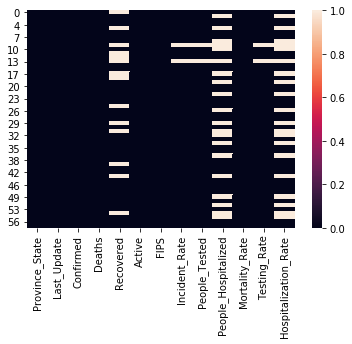

In [77]:
sns.heatmap(data.isnull())

In [86]:
#lets fill the null values using for loop
for col in ['Recovered','People_Hospitalized','Hospitalization_Rate','People_Tested','Testing_Rate','Incident_Rate']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [87]:
data.isnull().sum()

Province_State          0
Last_Update             0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [88]:
data.head()

,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,2020-05-21 02:32:54,13052,522,336.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,3353.942386,11.438860
1,Alaska,2020-05-21 02:32:54,401,10,352.0,39.0,2,54.815493,37045.0,65.0,2.493766,5063.940017,6.778043
3,Arizona,2020-05-21 02:32:54,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005
4,Arkansas,2020-05-21 02:32:54,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584
5,California,2020-05-21 02:32:54,85997,3497,336.0,82500.0,6,217.646575,1380120.0,65.0,4.066421,3492.893832,6.778043


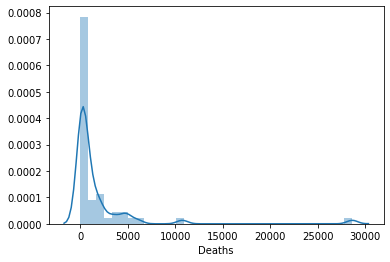

In [89]:
#lets use heatmap to plot each feature
sns.distplot(data['Deaths'])

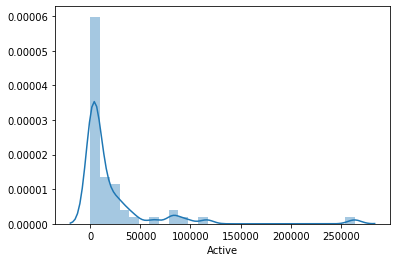

In [90]:
sns.distplot(data['Active'])

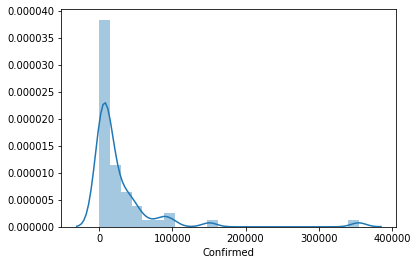

In [91]:

sns.distplot(data['Confirmed'])

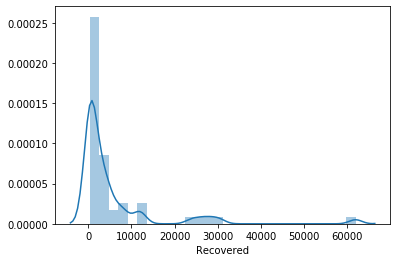

In [92]:

sns.distplot(data['Recovered'])

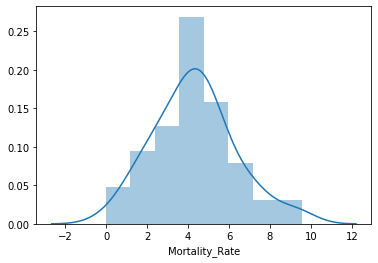

In [93]:

sns.distplot(data['Mortality_Rate'])

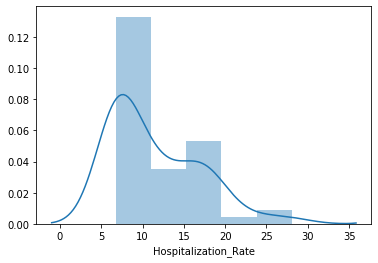

In [94]:

sns.distplot(data['Hospitalization_Rate'])

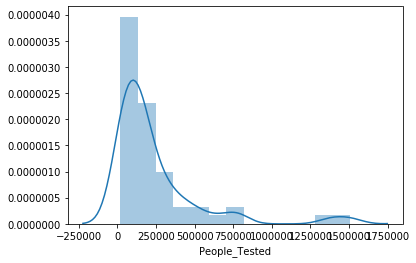

In [95]:

sns.distplot(data['People_Tested'])

In [96]:

data_ny.shape

(1, 18)

In [97]:
data.head()

,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,2020-05-21 02:32:54,13052,522,336.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,3353.942386,11.438860
1,Alaska,2020-05-21 02:32:54,401,10,352.0,39.0,2,54.815493,37045.0,65.0,2.493766,5063.940017,6.778043
3,Arizona,2020-05-21 02:32:54,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005
4,Arkansas,2020-05-21 02:32:54,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584
5,California,2020-05-21 02:32:54,85997,3497,336.0,82500.0,6,217.646575,1380120.0,65.0,4.066421,3492.893832,6.778043


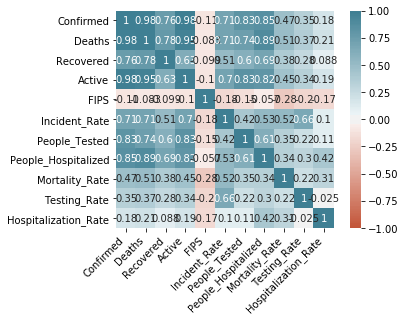

In [98]:
#correlation 
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

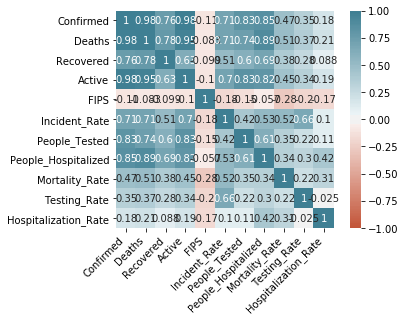

In [99]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [100]:
#splitting x and y variable
feature_cols=['FIPS','Confirmed']
X = data[feature_cols]

In [101]:
y = data['Deaths']
y

0       522
1        10
3       747
4       107
5      3497
6      1299
7      3529
8       310
9         0
10      407
11     2096
12     1697
13        3
15       17
16       77
17     4525
18     1864
19      393
20      202
21      376
22     2608
23       73
24     2123
25     6066
26     5060
27      786
28      570
29      640
30       16
31      138
32      377
33      190
34    10749
35      283
36    28636
37      726
38       49
40     1781
41      299
42      144
43     4770
45      538
46      407
47       46
48      305
49     1426
50       90
51       54
53     1075
54     1037
55       69
56      481
57       11
Name: Deaths, dtype: int64

In [102]:

#Spliting the data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [103]:
X_test.shape

(11, 2)

In [104]:
y_test.shape

(11,)

In [105]:
#Normalizing the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [106]:
y_test.shape

(11,)

In [107]:

X_test.shape

(11, 2)

In [108]:
#Model Prediction

#We can see that the dataset is continuous in nature and hence Linear Regression is apt here.

In [109]:
#Using sklearns linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
linear_regression_score = regressor.score(X_test, y_test)
print("Linear Regression Score:", linear_regression_score)

Linear Regression Score: 0.9051126785952721


In [110]:
#Using sklearns Decision tree regressor model
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
tree_score = regressor.score(X_test, y_test)
print("DT Score:", regressor.score(X_test, y_test))

DT Score: 0.1891040750270545


In [111]:
#Using sklearns Random forest regressor model 
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
forest_score = regressor.score(X_test, y_test)
print("RF Score:", regressor.score(X_test, y_test))

RF Score: 0.2031945945629945


In [112]:
#Using plynomial regression using polynomial features
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
poly_score = regressor.score(poly_reg.transform(X_test), y_test)
print("Poly Score:", regressor.score(poly_reg.transform(X_test), y_test))

Poly Score: -576521.412626522


In [113]:
# using sklearns MLP Regressor model

clf = MLPRegressor(max_iter=10000)
clf.fit(X_train, np.asarray(y_train).ravel())
mlp_regressor_score = clf.score(X_test, y_test)
print('MLP Regressor Score:', mlp_regressor_score)

MLP Regressor Score: 0.8425303279373249


In [ ]:
#we can see that the linear regression gives us the highest accuracy score which is 90.5%. Hence I chose Linear Regression for the best model.

In [114]:
#lets save the final model
from sklearn.externals import joblib

#save the model as pickle in a file
joblib.dump(LinearRegression,'Model Covid 19 USA.pkl')

['Model Covid 19 USA.pkl']